<a href="https://colab.research.google.com/github/phantheminhchau1/phantichdulieupython/blob/main/thongkesuydien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 200><center>Thống kê suy diễn</center></font>
<hr  width="30%" align="center" />
<p align='right'>Phan Thế Minh Châu</p>
<p align='right'>20E1020067</p>
<br>

**khai báo thư viện:**

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<hr>

**đọc dữ liệu:**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PhanTheMinhChau/phantichdulieupython/main/data/Diet_R.csv")
df.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
33,55,0,22,169,65,3,58.2
32,54,0,21,159,64,3,60.6
44,66,0,41,157,76,3,71.0
36,58,0,35,163,67,3,60.2
45,15,1,39,168,71,1,71.6
5,4,0,33,171,64,1,61.1
37,59,0,45,155,69,3,61.8
30,52,0,51,165,60,3,53.0
20,31,0,20,169,62,2,55.0


**làm sạch dữ liệu:**

In [3]:
df.replace(" ", np.nan, inplace=True) #chuyển đổi các ô trống sang NaN
df.dropna(inplace=True) #Xóa các hàng có giá trị NaN
df.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
60,46,1,37,194,78,2,76.3
4,3,0,55,170,64,1,63.3
61,47,1,44,163,79,2,73.6
58,44,1,33,190,76,2,72.5
72,73,1,40,179,79,3,74.5
7,6,0,50,201,66,1,64.0
44,66,0,41,157,76,3,71.0
6,5,0,50,170,65,1,62.2
53,23,1,39,166,87,1,81.9
42,64,0,56,171,73,3,68.9


<hr>

##**Các hàm phân tích ANOVA**

###Kiểm tra phân phối chuẩn:
**Phát biểu giả thiết:**
- H0: mẫu tuân theo phân phối chuẩn
- H1: Mẫu không tuân theo phân phối chuẩn

In [4]:
def shapiro(data): # kiểm tra phân phối chẩn hay không
    series = []
    for i in data.columns:
        series.append(data[i].dropna())
    for j in series:
        sts, p = stats.shapiro(j)
        if p > 0.05:
            print(f'không có bằng chứng để bác bỏ giả thiết H0: mẫu {j.name} tuân theo phân phối chuẩn')
        else:
            print(f'có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: mẫu {j.name} không tuân theo phân phối chuẩn')
    print()

**đánh giá qua biểu đồ:**

In [5]:
def hist(data):
  series = []
  id = 0
  for i in data.columns:
        series.append(data[i].dropna())
  fig, ax = plt.subplots(ncols=len(data.columns), figsize=(20,4))
  for j in series:
        mean = np.mean(data[j.name])
        # ddof=1 :: hiệu chỉnh
        std = np.std(data[j.name], ddof=1)
        domain = np.linspace(np.min(data[j.name]), np.max(data[j.name]))
        ax[id].plot(domain, stats.norm.pdf(domain, mean, std))
        #density=True :: chuẩn hóa dữ liệu về normal
        ax[id].hist(data[j.name], edgecolor='green', density=True)
        ax[id].title.set_text(j.name)
        id = id + 1
  fig.show()
def qq_plot(data):
  series = []
  id = 0
  for i in data.columns:
        series.append(data[i].dropna())
  fig, ax = plt.subplots(ncols=len(data.columns), figsize=(20,4))
  for j in series:
    sm.qqplot(data[j.name], fit=True, line ='45', ax= ax[id])
    ax[id].title.set_text(j.name)
    id = id + 1
  fig.show()

<hr>

###kiểm tra tính đồng nhất phương sai:
**Phát biểu giả thiết:**
- H0: Phương sai đồng nhất
- H1: phương sai không đồng nhất

In [6]:
def levene(data): # khiểm tra tính đồng nhất phương sai
    series = []
    for i in data.columns:
        series.append(data[i].dropna())
    sts, p = stats.levene(*series)
    if p > 0.05:
        print(f'không có bằng chứng để bác bỏ giả thiết H0: Phương sai đồng nhất\n')
    else:
        print(f'có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: phương sai không đồng nhất\n')

<hr>

###Kiểm tra tính đồng nhất về giá trị trung bình:
**Phát biểu giả thiết:**
- H0: các giá trị trung bình bằng nhau
- H1: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau

In [7]:
def anova(data):
    series = []
    for i in data.columns:
        series.append(data[i].dropna())
    sts, p = stats.f_oneway(*series)
    if p > 0.05:
        print('không có bằng chứng để bác bỏ giả thiết H0: các giá trị trung bình bằng nhau')
    else:
        print('có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau')

In [8]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

<hr>

##Tiến hành phân tích:

###**Ignore diet and test to see if weight has been lost** (Bỏ qua chế độ ăn kiêng và kiểm tra xem đã giảm cân chưa?)

**phát biểu giả thiết:**
- h0: Cân nặng trước khi kiểm tra và sau khi kiểm tra bằng nhau
- h1: Cân nặng trước khi kiểm tra và sau khi kiểm tra khác nhau

In [9]:
stat, p = stats.ttest_rel(df["pre.weight"], df["weight6weeks"])
print('Stat =', stat, 'P_value =', p)
if p > 0.05:
    print("không có bằng chứng để bác bỏ giả thiết H0: Cân nặng trước khi kiểm tra và sau khi kiểm tra bằng nhau")
else:
    print("có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Cân nặng trước khi kiểm tra và sau khi kiểm tra khác nhau")

Stat = 13.728486740903172 P_value = 3.7220652146643845e-22
có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Cân nặng trước khi kiểm tra và sau khi kiểm tra khác nhau


Text(0.5, 1.0, 'Weight before and after diet')

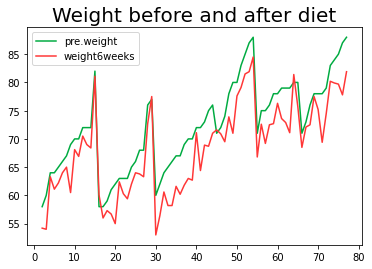

In [10]:
# Biểu đồ cân nặng trước và sau khi giảm cân
df[['pre.weight', 'weight6weeks']].plot(color= ['#00ab41','#ff3737'])
plt.title('Weight before and after diet', fontsize=20)

<hr>

###**Remove weight lost and get students to calculate it using before/after weights**

In [11]:
weight_lost = df["pre.weight"] - df["weight6weeks"] 
df['weightlost'] = weight_lost.values
df.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
46,16,1,31,158,72,1,70.9,1.1
65,51,1,31,182,80,2,75.7,4.3
3,2,0,46,192,60,1,54.0,6.0
35,57,0,20,169,67,3,61.6,5.4
40,62,0,31,170,72,3,71.1,0.9
57,43,1,54,196,75,2,69.2,5.8
21,32,0,51,174,63,2,62.4,0.6
59,45,1,45,160,78,2,72.7,5.3
20,31,0,20,169,62,2,55.0,7.0
11,10,0,45,165,70,1,66.9,3.1


<hr>

###**Summary statistics by diet**

In [12]:
# phân nhóm giá trị weightlost theo diet
weightlost_1 = df[(df['Diet'] == 1)]["weightlost"]
weightlost_2 = df[(df['Diet'] == 2)]["weightlost"]
weightlost_3 = df[(df['Diet'] == 3)]["weightlost"]
weight_lost = list(zip(weightlost_1, weightlost_2, weightlost_3))
df_diet =  pd.DataFrame(weight_lost, columns = ("Diet 1", "Diet 2", "Diet 3"))
df_diet.sample(10)

,Diet 1,Diet 2,Diet 3
4,2.8,7.0,7.8
8,1.9,3.0,7.0
14,-0.6,4.2,5.0
21,3.5,6.1,4.5
19,2.4,1.7,2.8
20,3.9,5.4,8.6
23,3.5,-1.4,4.1
9,3.1,2.0,7.3
12,3.6,3.3,4.1
10,1.5,4.2,0.9


        min  max      mean  median       std
Diet 1 -0.6  9.0  3.300000    3.05  2.240148
Diet 2 -2.1  7.9  3.225000    3.40  2.507944
Diet 3  0.5  8.6  4.933333    5.20  2.384309




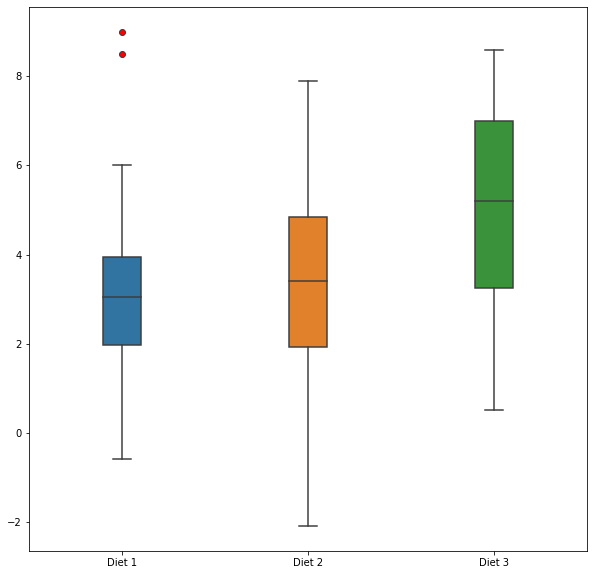

In [13]:
#Thống kê tóm tắt theo chế độ ăn uống
su_stat = df_diet.agg(
      {
          "Diet 1": ["min", "max", "mean", "median", "std"],
          "Diet 2": ["min", "max", "mean", "median", "std"],
          "Diet 3": ["min", "max", "mean", "median", "std"]
      }
).T
print(su_stat)
print("\n")
def box_plot(data): #vẽ đồ thị boxplot
  fig, ax = plt.subplots(figsize=(10,10))
  sns.boxplot(data= data,width=0.2, fliersize=12, flierprops = dict(marker=".",markerfacecolor='r'))
box_plot(df_diet)

<hr>

###**kiểm định ANOVA**

**kiểm tra phân phối chuẩn:**

In [14]:
shapiro(df_diet) #kiểm tra phân phối chuẩn bằng shapiro

không có bằng chứng để bác bỏ giả thiết H0: mẫu Diet 1 tuân theo phân phối chuẩn
không có bằng chứng để bác bỏ giả thiết H0: mẫu Diet 2 tuân theo phân phối chuẩn
không có bằng chứng để bác bỏ giả thiết H0: mẫu Diet 3 tuân theo phân phối chuẩn



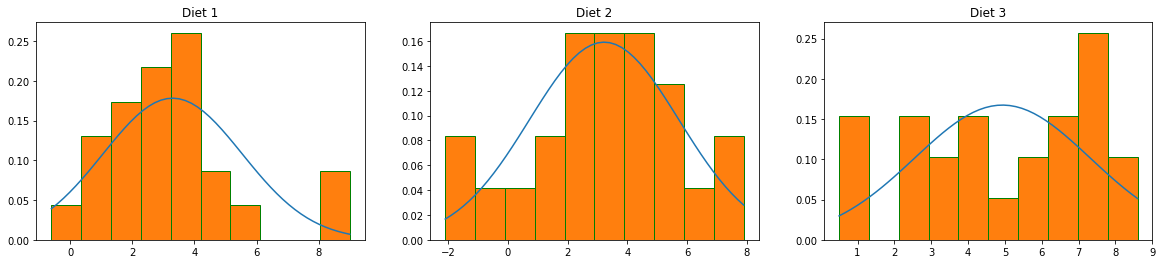

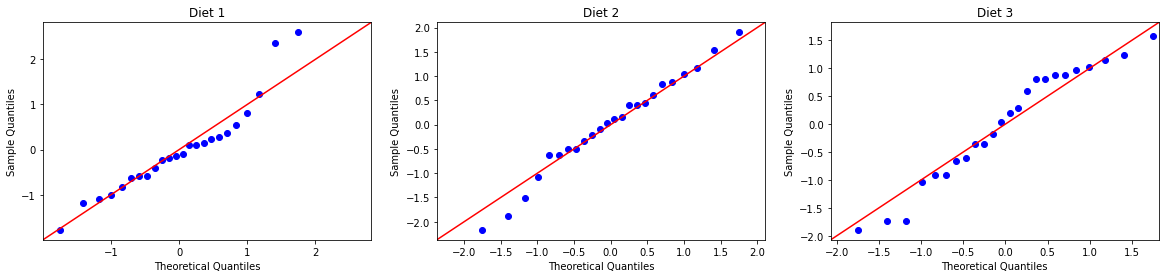

In [15]:
hist(df_diet) #kiểm tra phân phối chuẩn bằng đồ thị histogram
qq_plot(df_diet) #kiểm tra phân phối chuẩn bằng qq plot

**Kiểm tra tính đồng nhất về phương sai:**

In [16]:
levene(df_diet)  #kiểm tra tính đồng nhất về phương sai

không có bằng chứng để bác bỏ giả thiết H0: Phương sai đồng nhất



**Kiểm tra tính đồng nhất về giá trị trung bình:**

In [17]:
anova(df_diet) #phân tích anova

có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau


<br>
<br>

In [18]:
p = {}
p['mean1'] = np.mean(df_diet["Diet 1"])
p['mean2'] = np.mean(df_diet["Diet 2"])
p['mean3'] = np.mean(df_diet["Diet 3"])
dt = pd.DataFrame(p, index=[''])
dt

,mean1,mean2,mean3
,3.3,3.225,4.933333


**=> kết luận:** chế độ ăn ảnh hưởng đến việc giảm cân
- chế độ ăn hiệu quả nhất là nhóm diet 3

<hr>

###**Giới tính**

**phát biểu giả thiết:**
- h0: Chỉ số giảm cân của nam và nữ bằng nhau
- h1: Chỉ số giảm cân của nam và nữ khác nhau

In [19]:
stat, p = stats.ttest_ind(df[(df["gender"] == '0')]["weightlost"], df[(df["gender"] == '1')]["weightlost"])
print('Stat =', stat, 'P_value =', p)
if p > 0.05:
    print("không có bằng chứng để bác bỏ giả thiết H0: Chỉ số giảm cân của nam và nữ bằng nhau")
else:
    print("có bằng chứng để bác bỏ giả thiết H0, điều này ngụ ý chấp nhận giả thiết H1: Chỉ số giảm cân của nam và nữ khác nhau")

Stat = -0.20925085653363862 P_value = 0.8348273886348047
không có bằng chứng để bác bỏ giả thiết H0: Chỉ số giảm cân của nam và nữ bằng nhau


In [20]:
p = {}
p['mean1'] = np.mean(df[(df["gender"] == '0')]["weightlost"])
p['mean2'] = np.mean(df[(df["gender"] == '1')]["weightlost"])
p['score'], p['p_value'] = stats.ttest_1samp(df[(df["gender"] == '0')]["weightlost"], p['mean2'])
results(p)

,mean1,mean2,score,p_value,KetLuan
,3.893023,4.015152,-0.318316,0.751823,Chấp nhận H0 với mức ý nghĩa 0.05


**=> Kết luận:** Giới tính không ảnh hưởng đến việc giảm cân



<br>
<hr>

###**Means plot of weight lost by diet and gender**

In [21]:
mean_we_01 = df[(df["gender"] == '0') & (df["Diet"] == 1)]["weightlost"].mean()
mean_we_02 = df[(df["gender"] == '0') & (df["Diet"] == 2)]["weightlost"].mean()
mean_we_03 = df[(df["gender"] == '0') & (df["Diet"] == 3)]["weightlost"].mean()

mean_we_11 = df[(df["gender"] == '1') & (df["Diet"] == 1)]["weightlost"].mean()
mean_we_12 = df[(df["gender"] == '1') & (df["Diet"] == 2)]["weightlost"].mean()
mean_we_13 = df[(df["gender"] == '1') & (df["Diet"] == 3)]["weightlost"].mean()

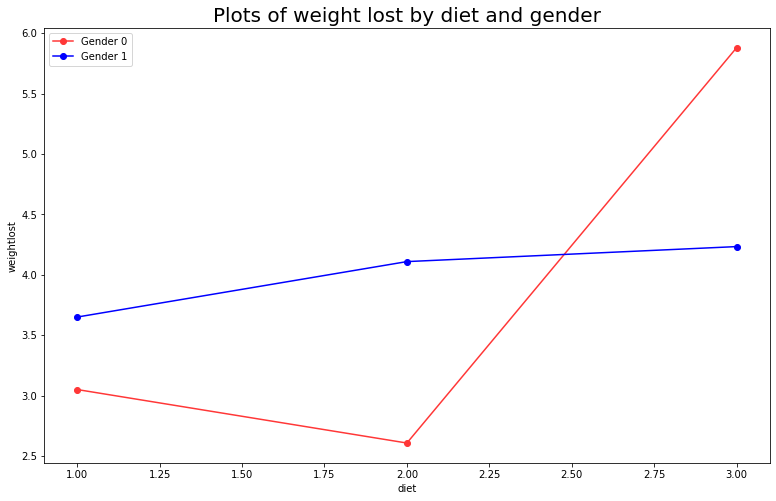

In [22]:
plt.figure(figsize=(13, 8))
plt.plot([1, 2, 3],[mean_we_01, mean_we_02, mean_we_03],'b-o',label='Gender 0', color="#ff3737");
plt.plot([1, 2, 3],[mean_we_11, mean_we_12, mean_we_13],'b-o',label='Gender 1');
plt.title('Plots of weight lost by diet and gender', fontsize= 20)
plt.xlabel('diet')
plt.ylabel('weightlost')
plt.legend()
plt.show()

###**chiều cao**

In [23]:
# phân nhóm theo chiều cao
height_1 = df[(df['Height'] < 160)]["weightlost"]                         #chiều cao dưới 160 cm
height_2 = df[(df['Height'] < 170) & (df['Height'] >= 160)]["weightlost"] #chiều cao từ 160 đến dưới 170 cm
height_3 = df[(df['Height'] < 180) & (df['Height'] >= 170)]["weightlost"] #chiều cao từ 170 đến dưới 180 cm 
height_4 = df[(df['Height'] >= 180)]["weightlost"]                        #chiều cao trên 180 cm
#lấy mẫu để kiểm định anova
height_sp1 = height_1.sample(9)
height_sp2 = height_2.sample(9)
height_sp3 = height_3.sample(9)
height_sp4 = height_4.sample(9)
#gộp các nhóm lại thành dataframe
weight_lost = list(zip(height_sp1, height_sp2, height_sp3, height_sp4))
df_height =  pd.DataFrame(weight_lost, columns = ("lùn", "vừa", "cao", "rất cao"))
df_height

,lùn,vừa,cao,rất cao
0,3.4,3.1,2.8,2.8
1,5.0,2.0,8.5,3.5
2,7.0,-0.6,3.9,2.4
3,2.5,-0.5,0.5,3.5
4,6.3,4.2,2.8,2.0
5,1.1,7.0,3.6,6.0
6,7.2,6.8,1.5,-1.4
7,3.0,1.9,7.3,4.3
8,3.8,5.4,4.3,4.2


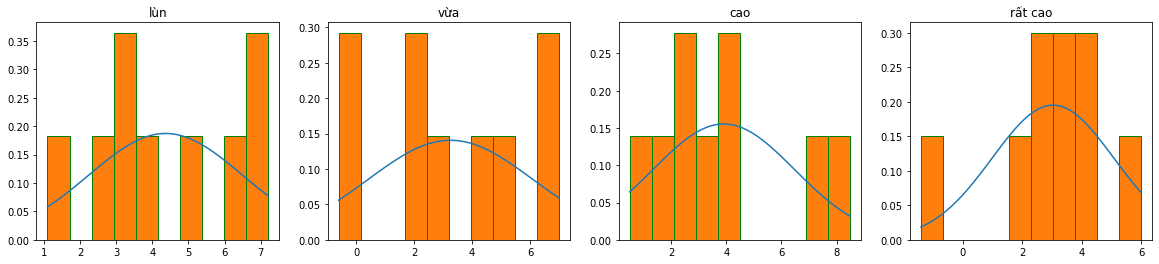

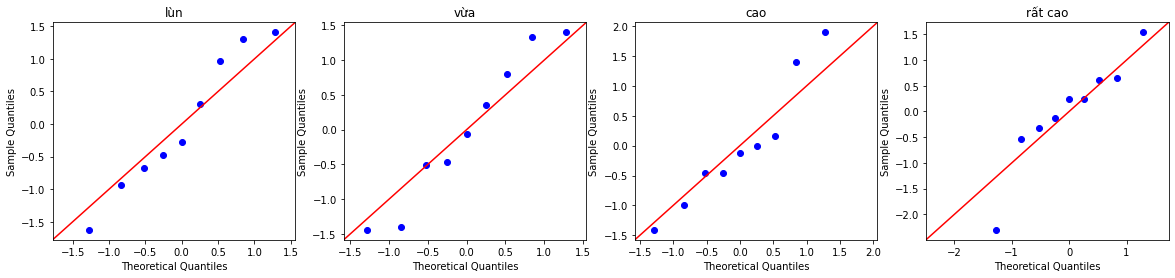

In [24]:
hist(df_height)       #kiểm tra phân phối chuẩn bằng histogram
qq_plot(df_height)    #kiểm tra phân phối chuẩn bằng qq plot

In [25]:
shapiro(df_height)
levene(df_height)
anova(df_height)

không có bằng chứng để bác bỏ giả thiết H0: mẫu lùn tuân theo phân phối chuẩn
không có bằng chứng để bác bỏ giả thiết H0: mẫu vừa tuân theo phân phối chuẩn
không có bằng chứng để bác bỏ giả thiết H0: mẫu cao tuân theo phân phối chuẩn
không có bằng chứng để bác bỏ giả thiết H0: mẫu rất cao tuân theo phân phối chuẩn

không có bằng chứng để bác bỏ giả thiết H0: Phương sai đồng nhất

không có bằng chứng để bác bỏ giả thiết H0: các giá trị trung bình bằng nhau


**=> kết luận:** chiều cao không ảnh hưởng đến việc giảm cân

<br>
<br>
<br>
<br>
<hr>